In [7]:
import pandas as pd
 
import matplotlib.pyplot as plt
import seaborn as sns
 
data = pd.read_csv('churn.csv')
data.head()

,customerID,Gender,Income,SeniorCitizen,Partner,Dependents,Tenure,ServicePlan1,ServicePlan2,ServicePlan3,...,ServicePlan6,ServicePlan7,ServicePlan8,ServicePlan9,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,4,0,Yes,No,1,No,No,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,3,0,No,No,34,Yes,No,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,4,0,No,No,2,Yes,No,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,1,0,No,No,45,No,No,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,2,0,No,No,2,Yes,No,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [8]:
#Find blanks in data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
customerID          7043 non-null object
Gender              7043 non-null object
Income              7043 non-null int64
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
Tenure              7043 non-null int64
ServicePlan1        7043 non-null object
ServicePlan2        7043 non-null object
ServicePlan3        7043 non-null object
ServicePlan4        7043 non-null object
ServicePlan5        7043 non-null object
ServicePlan6        7043 non-null object
ServicePlan7        7043 non-null object
ServicePlan8        7043 non-null object
ServicePlan9        7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null 

In [9]:
data['Gender'].replace(['Male','Female'],[0,1],inplace=True)
data['Partner'].replace(['Yes','No'],[1,0],inplace=True)
data['Dependents'].replace(['Yes','No'],[1,0],inplace=True)
data['ServicePlan1'].replace(['Yes','No'],[1,0],inplace=True)
data['ServicePlan2'].replace(['Yes','No'],[1,0],inplace=True)
data['ServicePlan3'].replace(['Yes','No'],[1,0],inplace=True)
data['ServicePlan4'].replace(['Yes','No'],[1,0],inplace=True)
data['ServicePlan5'].replace(['Yes','No'],[1,0],inplace=True)
data['ServicePlan6'].replace(['Yes','No'],[1,0],inplace=True)
data['ServicePlan7'].replace(['Yes','No'],[1,0],inplace=True)
data['ServicePlan8'].replace(['Yes','No'],[1,0],inplace=True)
data['ServicePlan9'].replace(['Yes','No'],[1,0],inplace=True)
data['Contract'].replace(['Month-to-month', 'One year', 'Two year'],[0,1,2],inplace=True)
data['PaperlessBilling'].replace(['Yes','No'],[1,0],inplace=True)
data['PaymentMethod'].replace(['Electronic check', 'Mailed check', 'Bank transfer (automatic)','Credit card (automatic)'],[0,1,2,3],inplace=True)
data['Churn'].replace(['Yes','No'],[1,0],inplace=True)

data.pop('customerID')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
Gender              7043 non-null int64
Income              7043 non-null int64
SeniorCitizen       7043 non-null int64
Partner             7043 non-null int64
Dependents          7043 non-null int64
Tenure              7043 non-null int64
ServicePlan1        7043 non-null int64
ServicePlan2        7043 non-null int64
ServicePlan3        7043 non-null int64
ServicePlan4        7043 non-null int64
ServicePlan5        7043 non-null int64
ServicePlan6        7043 non-null int64
ServicePlan7        7043 non-null int64
ServicePlan8        7043 non-null int64
ServicePlan9        7043 non-null int64
Contract            7043 non-null int64
PaperlessBilling    7043 non-null int64
PaymentMethod       7043 non-null int64
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null int64
dtypes: float64(1), int64(19), object(1)
memory us

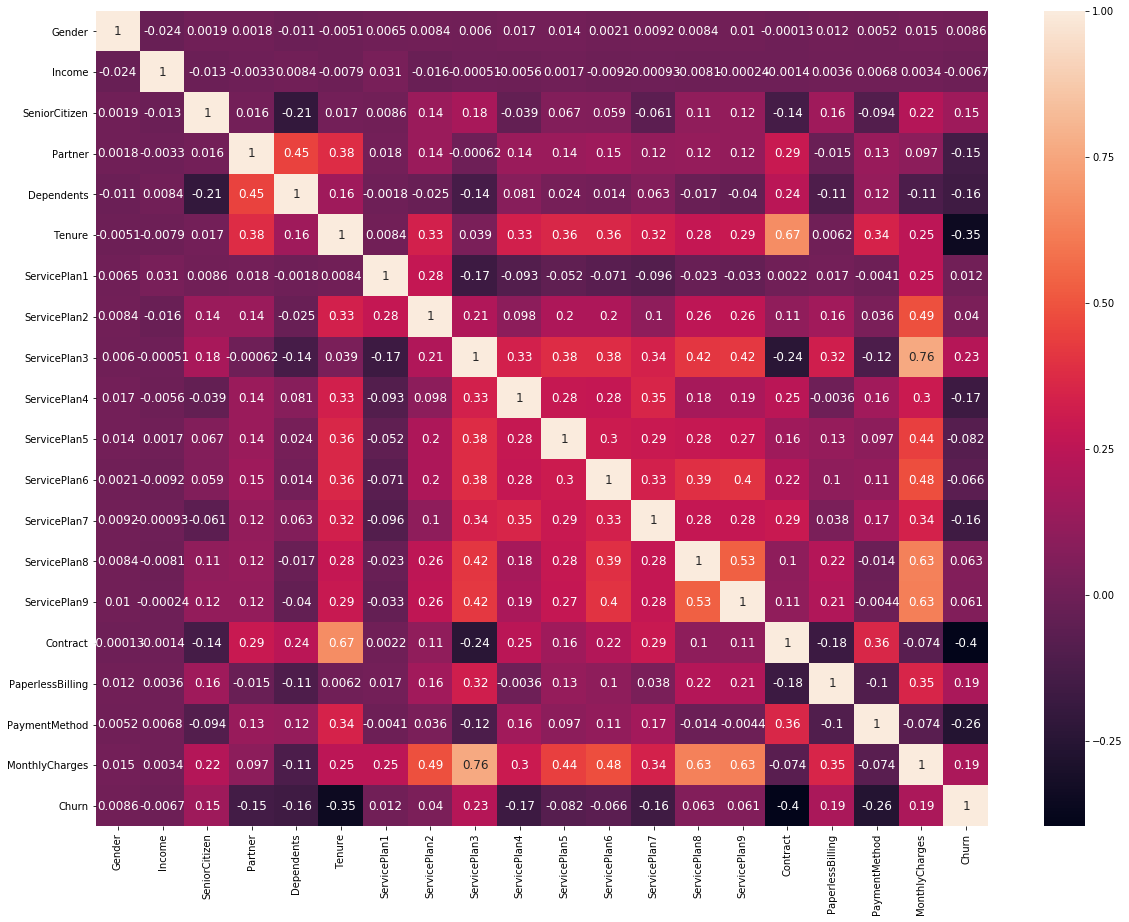

In [17]:
# data.pop('TotalCharges')
corr = data.corr()
corr.to_csv('file.csv')
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot = True, annot_kws={'size':12})
heat_map=plt.gcf()
heat_map.set_size_inches(20,15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [11]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Churn Rate Correlations")
print(get_top_abs_correlations(data, 4))

Top Absolute Churn Rate Correlations
ServicePlan3  MonthlyCharges    0.763557
Tenure        Contract          0.671607
ServicePlan8  MonthlyCharges    0.629603
ServicePlan9  MonthlyCharges    0.627429
dtype: float64
